# Case Study on Regression

## 


## The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?

## Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.







## 

In [1]:
# importing libraries
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
data = pd.read_csv(r'C:\Users\Arathi\Downloads\car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
data['Year'].value_counts() 

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [8]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [9]:
data.info

<bound method DataFrame.info of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [10]:
# shape of the data
data.dtypes

Year     int64
Price    int64
dtype: object

In [11]:
# checking for null values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [12]:
# there are no null values in this dataset

<AxesSubplot:title={'center':'scatterplot of Year and Price  percentage'}, xlabel='Year', ylabel='Price'>

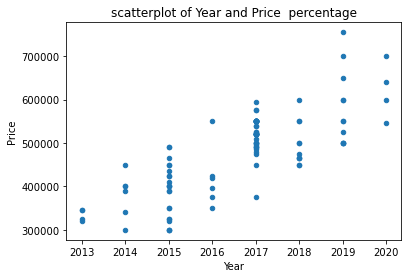

In [13]:
data.plot.scatter(x='Year',y='Price', title='scatterplot of Year and Price  percentage')


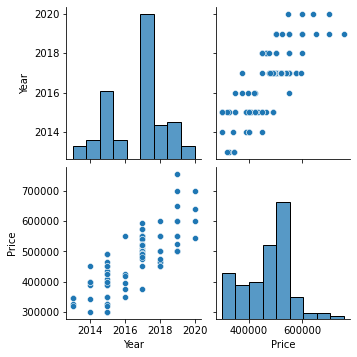

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
# split into x and y variable ( x=feature - y=target)

x = data['Year']
y = data['Price']
print('x is', x)
print('y is', y)

x is 0      2018
1      2019
2      2019
3      2018
4      2018
       ... 
107    2016
108    2014
109    2015
110    2016
111    2015
Name: Year, Length: 112, dtype: int64
y is 0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


<AxesSubplot:>

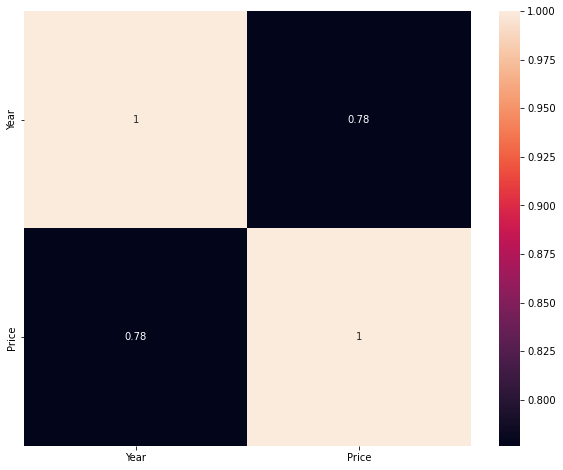

In [16]:
# correlation matrix   , heatmap
corrmatrix =data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True)

In [17]:
# find the correlation btween x,y using  the librarie spearman
x.corr(y,method='spearman') # spearman's cho

0.7237639003348305

In [18]:
# fetching the values from the given column
print(data['Price'].values)

[465000 755000 700000 465000 465000 350000 425000 575000 509999 575000
 500000 500000 500000 600000 475000 500000 500000 550000 500000 500000
 500000 500000 434999 550000 550000 550000 550000 550000 550000 550000
 650000 550000 550000 550000 450000 550000 550000 486000 475000 545000
 525000 600000 550000 550000 550000 450000 500000 450000 396000 600000
 325000 550000 345000 345000 525000 550000 341000 550000 450000 550000
 490000 540000 540000 595000 490000 495000 525000 400000 465000 300000
 450000 490000 300000 320000 490000 490000 450000 325000 409999 400000
 390000 390000 390000 480000 325000 320000 520000 520000 520000 520000
 520000 520000 520000 520000 520000 520000 520000 640000 700000 600000
 350000 400000 350000 375000 400000 400000 300000 375000 300000 425000
 420000 425000]


In [19]:
# reshaping it to  our expected format to feed into the model
print('expected format is: \n' , data['Price'].values.reshape(-1,1))

x = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

expected format is: 
 [[465000]
 [755000]
 [700000]
 [465000]
 [465000]
 [350000]
 [425000]
 [575000]
 [509999]
 [575000]
 [500000]
 [500000]
 [500000]
 [600000]
 [475000]
 [500000]
 [500000]
 [550000]
 [500000]
 [500000]
 [500000]
 [500000]
 [434999]
 [550000]
 [550000]
 [550000]
 [550000]
 [550000]
 [550000]
 [550000]
 [650000]
 [550000]
 [550000]
 [550000]
 [450000]
 [550000]
 [550000]
 [486000]
 [475000]
 [545000]
 [525000]
 [600000]
 [550000]
 [550000]
 [550000]
 [450000]
 [500000]
 [450000]
 [396000]
 [600000]
 [325000]
 [550000]
 [345000]
 [345000]
 [525000]
 [550000]
 [341000]
 [550000]
 [450000]
 [550000]
 [490000]
 [540000]
 [540000]
 [595000]
 [490000]
 [495000]
 [525000]
 [400000]
 [465000]
 [300000]
 [450000]
 [490000]
 [300000]
 [320000]
 [490000]
 [490000]
 [450000]
 [325000]
 [409999]
 [400000]
 [390000]
 [390000]
 [390000]
 [480000]
 [325000]
 [320000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [640000

### Applying linear regression on the train data and predicting using x_test

In [20]:
# importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# splitting the data into training and testing set

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=50)

In [22]:
print('x train is \n', x_train)
print('y train is\n', y_train)

x train is 
 [[2017]
 [2019]
 [2020]
 [2015]
 [2017]
 [2014]
 [2015]
 [2020]
 [2017]
 [2017]
 [2019]
 [2018]
 [2018]
 [2017]
 [2017]
 [2017]
 [2019]
 [2013]
 [2015]
 [2013]
 [2015]
 [2015]
 [2017]
 [2017]
 [2014]
 [2015]
 [2015]
 [2017]
 [2014]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2013]
 [2014]
 [2018]
 [2017]
 [2017]
 [2020]
 [2017]
 [2017]
 [2017]
 [2019]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2016]
 [2015]
 [2015]
 [2018]
 [2018]
 [2019]
 [2015]
 [2015]
 [2017]
 [2015]
 [2016]
 [2020]
 [2019]
 [2015]
 [2016]
 [2017]
 [2017]
 [2015]
 [2019]
 [2015]
 [2018]
 [2017]
 [2019]
 [2018]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2015]
 [2017]
 [2017]
 [2019]
 [2015]
 [2015]
 [2014]
 [2015]
 [2015]
 [2018]
 [2017]
 [2017]
 [2018]
 [2017]
 [2016]]
y train is
 [[450000]
 [550000]
 [700000]
 [300000]
 [550000]
 [300000]
 [325000]
 [545000]
 [500000]
 [540000]
 [500000]
 [475000]
 [465000]
 [520000]
 [500000]
 [509999]
 [525000]
 [34

In [23]:
# creating a linear regression model

In [24]:
### creating an instance of the linear regression
regressor = LinearRegression()


In [25]:
### training the ML model on the train data 
# using our xtrain and ytrain lets fit the data

regressor.fit(x_train, y_train)

LinearRegression()

In [26]:
# let's make a prediction
#regressor as best fit line we have fitted our data using x train and y train
y_pred = regressor.predict(x_test)
print('y_pred for the given test data is:\n',y_pred)

y_pred for the given test data is:
 [[315642.16057703]
 [498081.18992086]
 [543690.94725682]
 [498081.18992086]
 [498081.18992086]
 [498081.18992086]
 [498081.18992086]
 [498081.18992086]
 [452471.4325849 ]
 [543690.94725682]
 [361251.91791297]
 [589300.70459278]]


In [27]:
x_test

array([[2013],
       [2017],
       [2018],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2016],
       [2018],
       [2014],
       [2019]], dtype=int64)

In [28]:
# flation 
import numpy 
x_test = list(numpy.concatenate(x_test).flat)
x_test

[2013, 2017, 2018, 2017, 2017, 2017, 2017, 2017, 2016, 2018, 2014, 2019]

In [29]:
y_test = list(numpy.concatenate(y_test).flat)
y_test

[325000,
 500000,
 550000,
 550000,
 495000,
 540000,
 490000,
 490000,
 550000,
 450000,
 450000,
 500000]

In [30]:
y_pred = list(numpy.concatenate(y_pred).flat)
y_pred

[315642.160577029,
 498081.18992085755,
 543690.9472568184,
 498081.18992085755,
 498081.18992085755,
 498081.18992085755,
 498081.18992085755,
 498081.18992085755,
 452471.4325848967,
 543690.9472568184,
 361251.91791297495,
 589300.7045927793]

In [31]:
data_new = pd.DataFrame({'Year':x_test,'actual_data':y_test,'predicted':y_pred})
data_new

,Year,actual_data,predicted
0,2013,325000,315642.160577
1,2017,500000,498081.189921
2,2018,550000,543690.947257
3,2017,550000,498081.189921
4,2017,495000,498081.189921
5,2017,540000,498081.189921
6,2017,490000,498081.189921
7,2017,490000,498081.189921
8,2016,550000,452471.432585
9,2018,450000,543690.947257


In [32]:
# evaluate our model
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
# mean square error

mse = mean_squared_error(y_test,y_pred)
print('The MSE for this model predictions is',mse)

The MSE for this model predictions is 3238713548.583687


In [34]:
# root mean squared  log error

rsv = r2_score(y_test,y_pred)
print('R squared value is',rsv)

R squared value is 0.11554190973629641


### Applying Lasso regression on the train data and predicting using x_test

In [35]:
## importing libraries

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [36]:
# reshaping it to  our expected format to feed into the model
print('expected format is: \n' , data['Price'].values.reshape(-1,1))

x = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

expected format is: 
 [[465000]
 [755000]
 [700000]
 [465000]
 [465000]
 [350000]
 [425000]
 [575000]
 [509999]
 [575000]
 [500000]
 [500000]
 [500000]
 [600000]
 [475000]
 [500000]
 [500000]
 [550000]
 [500000]
 [500000]
 [500000]
 [500000]
 [434999]
 [550000]
 [550000]
 [550000]
 [550000]
 [550000]
 [550000]
 [550000]
 [650000]
 [550000]
 [550000]
 [550000]
 [450000]
 [550000]
 [550000]
 [486000]
 [475000]
 [545000]
 [525000]
 [600000]
 [550000]
 [550000]
 [550000]
 [450000]
 [500000]
 [450000]
 [396000]
 [600000]
 [325000]
 [550000]
 [345000]
 [345000]
 [525000]
 [550000]
 [341000]
 [550000]
 [450000]
 [550000]
 [490000]
 [540000]
 [540000]
 [595000]
 [490000]
 [495000]
 [525000]
 [400000]
 [465000]
 [300000]
 [450000]
 [490000]
 [300000]
 [320000]
 [490000]
 [490000]
 [450000]
 [325000]
 [409999]
 [400000]
 [390000]
 [390000]
 [390000]
 [480000]
 [325000]
 [320000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [520000]
 [640000

In [37]:
# splitting the data into training and testing set

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=50)

In [38]:
print('x train is \n', x_train)
print('y train is\n', y_train)

x train is 
 [[2017]
 [2019]
 [2020]
 [2015]
 [2017]
 [2014]
 [2015]
 [2020]
 [2017]
 [2017]
 [2019]
 [2018]
 [2018]
 [2017]
 [2017]
 [2017]
 [2019]
 [2013]
 [2015]
 [2013]
 [2015]
 [2015]
 [2017]
 [2017]
 [2014]
 [2015]
 [2015]
 [2017]
 [2014]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2013]
 [2014]
 [2018]
 [2017]
 [2017]
 [2020]
 [2017]
 [2017]
 [2017]
 [2019]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2016]
 [2015]
 [2015]
 [2018]
 [2018]
 [2019]
 [2015]
 [2015]
 [2017]
 [2015]
 [2016]
 [2020]
 [2019]
 [2015]
 [2016]
 [2017]
 [2017]
 [2015]
 [2019]
 [2015]
 [2018]
 [2017]
 [2019]
 [2018]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2015]
 [2017]
 [2017]
 [2019]
 [2015]
 [2015]
 [2014]
 [2015]
 [2015]
 [2018]
 [2017]
 [2017]
 [2018]
 [2017]
 [2016]]
y train is
 [[450000]
 [550000]
 [700000]
 [300000]
 [550000]
 [300000]
 [325000]
 [545000]
 [500000]
 [540000]
 [500000]
 [475000]
 [465000]
 [520000]
 [500000]
 [509999]
 [525000]
 [34

In [39]:
# creating a linear regression model

In [40]:
### creating an instance of the linear regression

Lasso = Lasso(alpha=1.0)

In [41]:
### training the ML model on the train data 
# using our xtrain and ytrain lets fit the data

Lasso.fit(x_train,y_train)

Lasso()

In [42]:
# let's make a prediction

y_pred2= Lasso.predict(x_test)
print('y_pred for the given test data is:\n',y_pred2) 

y_pred for the given test data is:
 [315643.55014956 498081.06497292 543690.44367877 498081.06497292
 498081.06497292 498081.06497292 498081.06497292 498081.06497292
 452471.68626708 543690.44367877 361252.9288554  589299.82238461]


In [43]:
MSE = mean_squared_error(y_test,y_pred2)
print('The MSE for this model predictions is',MSE)

The MSE for this model predictions is 3238673434.0918307


In [44]:
RSV = r2_score(y_test,y_pred2)
print('R squared value is',RSV)

R squared value is 0.11555286457571856
